In [1]:
import torch


import pickle 
import numpy as np

import matplotlib.pyplot as plt
# %matplotlib inline
plt.switch_backend('agg')

import random
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [2]:
x_axis = [x for x in range(100,10050,50)]

In [3]:
len(x_axis)

199

In [4]:
num_seeds = 5

# Plot actual accuracies

In [5]:
def get_min_max_error(y, yerr):
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    return ymin, ymax

In [ ]:
# def accuracy_moving_average(losses,window=5,boundary='valid',ylim=(85,100)):
#     mav_losses = np.convolve(losses,np.ones(window)/window,boundary)
#     corrected_mav_losses = np.append(np.full(window-1,np.nan),mav_losses)
#     return corrected_mav_losses
#     plt.figure(figsize=(10,5))
#     plt.plot(losses, color='green')
#     plt.plot(corrected_mav_losses, color ='red')
#     plt.ylim(ylim)
#     plt.show()

In [6]:
def get_mean_variance(accuracy_list_1,accuracy_list_2,accuracy_list_3,accuracy_list_4, accuracy_list_5):
    accuracies = torch.zeros(num_seeds,len(x_axis))
    accuracies[0] = accuracy_list_1
    accuracies[1]  =accuracy_list_2
    accuracies[2]  =accuracy_list_3
    accuracies[3]  =accuracy_list_4
    accuracies[4]  =accuracy_list_5

    mean_ = accuracies.mean(dim = 0).numpy()
    variance = accuracies.std(dim = 0).numpy()
    
    return mean_, variance

In [7]:
with open('../All_random_seeds/beta_0.5/results_BETA_0.5_seed_123/accuracy_list', 'rb') as pickle_file:
    accuracy_list_1 = pickle.load(pickle_file)
with open('../All_random_seeds/beta_0.5/results_BETA_0.5_seed_190/accuracy_list', 'rb') as pickle_file:
    accuracy_list_2 = pickle.load(pickle_file)    
with open('../All_random_seeds/beta_0.5/results_BETA_0.5_seed_2/accuracy_list', 'rb') as pickle_file:
    accuracy_list_3 = pickle.load(pickle_file)
with open('../All_random_seeds/beta_0.5/results_BETA_0.5_seed_22/accuracy_list', 'rb') as pickle_file:
    accuracy_list_4 = pickle.load(pickle_file)
with open('../All_random_seeds/beta_0.5/results_BETA_0.5_seed_69/accuracy_list', 'rb') as pickle_file:
    accuracy_list_5 = pickle.load(pickle_file)

In [8]:
mean_beta_0_5, variance_beta_0_5 = get_mean_variance(accuracy_list_1,accuracy_list_2,accuracy_list_3,accuracy_list_4, accuracy_list_5)

In [9]:
with open('../All_random_seeds/beta_0.25/results_BETA_0.25_seed_123/accuracy_list', 'rb') as pickle_file:
    accuracy_list_1 = pickle.load(pickle_file)
with open('../All_random_seeds/beta_0.25/results_BETA_0.25_seed_190/accuracy_list', 'rb') as pickle_file:
    accuracy_list_2 = pickle.load(pickle_file)    
with open('../All_random_seeds/beta_0.25/results_BETA_0.25_seed_2/accuracy_list', 'rb') as pickle_file:
    accuracy_list_3 = pickle.load(pickle_file)
with open('../All_random_seeds/beta_0.25/results_BETA_0.25_seed_22/accuracy_list', 'rb') as pickle_file:
    accuracy_list_4 = pickle.load(pickle_file)
with open('../All_random_seeds/beta_0.25/results_BETA_0.25_seed_69/accuracy_list', 'rb') as pickle_file:
    accuracy_list_5 = pickle.load(pickle_file)

In [10]:
mean_beta_0_25, variance_beta_0_25 = get_mean_variance(accuracy_list_1,accuracy_list_2,accuracy_list_3,accuracy_list_4,accuracy_list_5)

In [11]:
with open('../All_random_seeds/Gaal/results_gaal_123/accuracy_list', 'rb') as pickle_file:
    accuracy_list_1 = pickle.load(pickle_file)
with open('../All_random_seeds/Gaal/results_gaal_190/accuracy_list', 'rb') as pickle_file:
    accuracy_list_2 = pickle.load(pickle_file)    
with open('../All_random_seeds/Gaal/results_gaal_2/accuracy_list', 'rb') as pickle_file:
    accuracy_list_3 = pickle.load(pickle_file)
with open('../All_random_seeds/Gaal/results_gaal_22/accuracy_list', 'rb') as pickle_file:
    accuracy_list_4 = pickle.load(pickle_file)
with open('../All_random_seeds/Gaal/results_gaal_69/accuracy_list', 'rb') as pickle_file:
    accuracy_list_5 = pickle.load(pickle_file)

In [12]:
mean_gaal, variance_gaal = get_mean_variance(accuracy_list_1,accuracy_list_2,accuracy_list_3,accuracy_list_4,accuracy_list_5)

In [13]:
with open("../All_random_seeds/Simple_GAN/results_simple_gan 123/accuracy_list", 'rb') as pickle_file:
    accuracy_list_1 = pickle.load(pickle_file)
with open("../All_random_seeds/Simple_GAN/results_simple_gan 190/accuracy_list", 'rb') as pickle_file:
    accuracy_list_2 = pickle.load(pickle_file)    
with open("../All_random_seeds/Simple_GAN/results_simple_gan 2/accuracy_list", 'rb') as pickle_file:
    accuracy_list_3 = pickle.load(pickle_file)
with open("../All_random_seeds/Simple_GAN/results_simple_gan 22/accuracy_list", 'rb') as pickle_file:
    accuracy_list_4 = pickle.load(pickle_file)
with open("../All_random_seeds/Simple_GAN/results_simple_gan 69/accuracy_list", 'rb') as pickle_file:
    accuracy_list_5 = pickle.load(pickle_file)

In [14]:
mean_gan, variance_gan = get_mean_variance(accuracy_list_1,accuracy_list_2,accuracy_list_3,accuracy_list_4,accuracy_list_5)

In [15]:
alpha_fill=0.3
ax = None

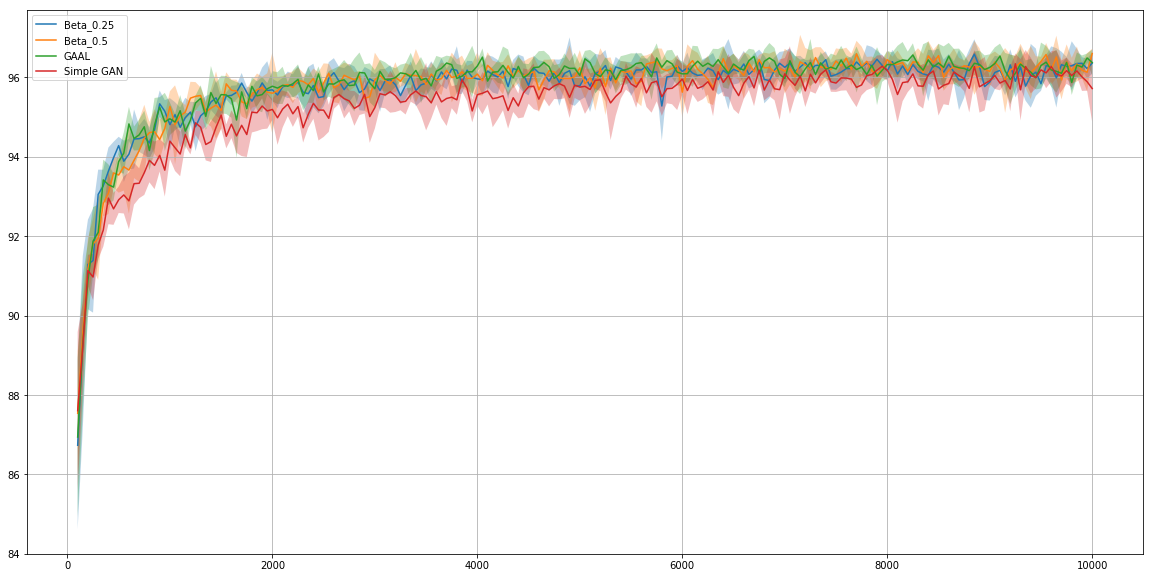

In [16]:
plt.figure(figsize=(20,10))
ax = ax if ax is not None else plt.gca()

plt.grid(True) 
var_min, var_max = get_min_max_error(mean_beta_0_25, variance_beta_0_25)
ax.plot(x_axis, mean_beta_0_25)
ax.fill_between(x_axis, var_max, var_min,alpha=alpha_fill)

var_min, var_max = get_min_max_error(mean_beta_0_5, variance_beta_0_5)
ax.plot(x_axis, mean_beta_0_5)
ax.fill_between(x_axis, var_max, var_min,alpha=alpha_fill)

var_min, var_max = get_min_max_error(mean_gaal, variance_gaal)
ax.plot(x_axis, mean_gaal)
ax.fill_between(x_axis, var_max, var_min,alpha=alpha_fill)

var_min, var_max = get_min_max_error(mean_gan, variance_gan)
ax.plot(x_axis, mean_gan)
ax.fill_between(x_axis, var_max, var_min,alpha=alpha_fill)

plt.legend(('Beta_0.25','Beta_0.5', 'GAAL', "Simple GAN"))
plt.savefig("../result_plots/Comparison of algorithms")
plt.show()

# Beta -0.5 Label Frequency and Accuracy

# Plotting label frequencies

In [ ]:
def errorfill(i, x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
#     if color is None:
#         color = ax._get_lines.color_cycle.next()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    plt.grid(True) 
    ax.plot(x, y)
    ax.fill_between(x, ymax, ymin,alpha=alpha_fill)
   

In [ ]:
label_frequency = torch.zeros(num_seeds,10,len(x_axis))

In [ ]:
with open('../All_random_seeds/beta_0.5/results_BETA_0.5_seed_123/label_frequency', 'rb') as pickle_file:
    label_freq_1 = pickle.load(pickle_file)
with open('../All_random_seeds/beta_0.5/results_BETA_0.5_seed_190/label_frequency', 'rb') as pickle_file:
    label_freq_2 = pickle.load(pickle_file)
with open('../All_random_seeds/beta_0.5/results_BETA_0.5_seed_2/label_frequency', 'rb') as pickle_file:
    label_freq_3 = pickle.load(pickle_file)
with open('../All_random_seeds/beta_0.5/results_BETA_0.5_seed_22/label_frequency', 'rb') as pickle_file:
    label_freq_4 = pickle.load(pickle_file)
with open('../All_random_seeds/beta_0.5/results_BETA_0.5_seed_69/label_frequency', 'rb') as pickle_file:
    label_freq_5 = pickle.load(pickle_file)

In [ ]:
label_freq_1.shape

In [ ]:
label_frequency[0] = label_freq_1.transpose(1,0)
label_frequency[1] = label_freq_2.transpose(1,0)
label_frequency[2] = label_freq_3.transpose(1,0)
label_frequency[3] = label_freq_4.transpose(1,0)
label_frequency[4] = label_freq_5.transpose(1,0)

In [ ]:
label_frequency.shape

In [ ]:
mean_ = label_frequency.mean(dim = 0)
variance = label_frequency.std(dim = 0)

In [ ]:
plt.figure(figsize=(20,10))
for i in range(10):
    errorfill(i, x_axis, mean_[i].numpy(), variance[i].numpy())
plt.legend(("Class 0","Class 1", "Class 2", "Class 3","Class 4", "Class 5","Class 6","Class 7","Class 8","Class 9"))
plt.savefig("../result_plots/Label_acc_freq_results/Beta_0.5/label_frequency")
plt.show()

# Plotting per class accuracies

In [ ]:
per_class_accuracy = torch.zeros(num_seeds,10,199)

In [ ]:
with open('../All_random_seeds/beta_0.5/results_BETA_0.5_seed_123/per_class_accuracy', 'rb') as pickle_file:
    per_class_acc_1 = pickle.load(pickle_file)
with open('../All_random_seeds/beta_0.5/results_BETA_0.5_seed_190/per_class_accuracy', 'rb') as pickle_file:
    per_class_acc_2 = pickle.load(pickle_file)
with open('../All_random_seeds/beta_0.5/results_BETA_0.5_seed_2/per_class_accuracy', 'rb') as pickle_file:
    per_class_acc_3 = pickle.load(pickle_file)
with open('../All_random_seeds/beta_0.5/results_BETA_0.5_seed_22/per_class_accuracy', 'rb') as pickle_file:
    per_class_acc_4 = pickle.load(pickle_file)
with open('../All_random_seeds/beta_0.5/results_BETA_0.5_seed_69/per_class_accuracy', 'rb') as pickle_file:
    per_class_acc_5 = pickle.load(pickle_file)

In [ ]:
per_class_acc_1.shape

In [ ]:
per_class_accuracy[0] =  per_class_acc_1.transpose(1,0)
per_class_accuracy[1] =  per_class_acc_2.transpose(1,0)
per_class_accuracy[2] =  per_class_acc_3.transpose(1,0)
per_class_accuracy[3] =  per_class_acc_4.transpose(1,0)
per_class_accuracy[4] =  per_class_acc_5.transpose(1,0)

In [ ]:
per_class_accuracy[1]

In [ ]:
mean_ = per_class_accuracy.mean(dim = 0)
variance = per_class_accuracy.std(dim = 0)

In [ ]:
plt.figure(figsize=(20,10))
plt.ylim((0.85,1.00))
for i in range(10):
    errorfill(i, x_axis, mean_[i].numpy(), variance[i].numpy())
plt.legend(("Class 0","Class 1", "Class 2", "Class 3","Class 4", "Class 5","Class 6","Class 7","Class 8","Class 9"))
plt.savefig("../result_plots/Label_acc_freq_results/Beta_0.5/Per_class_accuracy")
plt.show()